In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [14]:
# Load data
df = pd.read_csv('../data/parallelism.csv')
df_plain_run = pd.read_csv('../data/plain_run.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = parallelism, _y = jpeg, rest = plain run
df_merged = pd.merge(pd.merge(df, df_jpeg, on='file_name'), df_plain_run, on='file_name')

df_merged['time_ratio'] = df_merged['transcoding_time_x'] / df_merged['transcoding_time']

df_merged


,file_name,file_size_original_x,file_size_transcoded_x,compression_ratio_x,transcoding_time_x,file_size_original_y,file_size_transcoded_y,compression_ratio_y,transcoding_time_y,file_size_original,file_size_transcoded,compression_ratio,transcoding_time,time_ratio
0,test_black_white,331351,2748058,8.293495,832,331351,54502,0.164484,40,331351,2748058,8.293495,969,0.858617
1,test_gradient,142670,36116,0.253144,61,142670,18179,0.127420,32,142670,36116,0.253144,85,0.717647
2,test_medium,3886238,14702810,3.783301,3203,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916,0.817926
3,test_large,14784572,52259864,3.534757,15793,14784572,2559562,0.173124,743,14784572,52259864,3.534757,19635,0.804329
4,test_color,502888,2811228,5.590167,850,502888,61321,0.121938,52,502888,2811228,5.590167,1033,0.822846
5,test_small,974331,4533948,4.653396,1160,974331,155999,0.160109,59,974331,4533948,4.653396,1411,0.822112
6,test_pixel,7649,68090,8.901817,78,7649,3804,0.497320,22,7649,68090,8.901817,94,0.829787
7,test_detail_high,785610,3602062,4.585051,986,785610,131051,0.166814,57,785610,3602062,4.585051,1169,0.843456
8,test_tiny,245004,1207041,4.926618,260,245004,39110,0.159630,33,245004,1207041,4.926618,309,0.841424
9,test_detail_low,345237,3526027,10.213352,963,345237,85805,0.248539,47,345237,3526027,10.213352,1126,0.855240


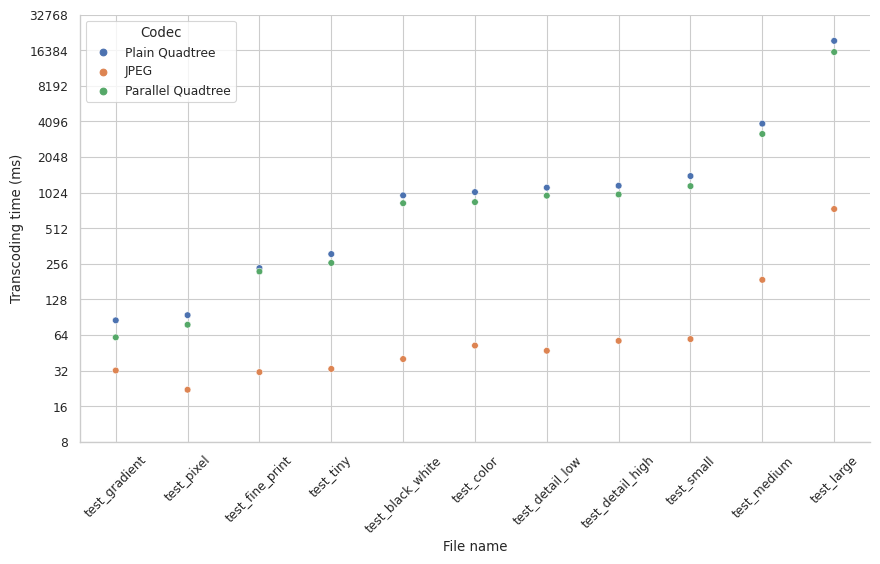

In [15]:
# Transcoding time
df_sorted = df_merged.sort_values('transcoding_time_x')

df_first = df_sorted.loc[:, ('file_name', 'transcoding_time')].rename(
    columns={'transcoding_time': 't'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'transcoding_time_x')].rename(
    columns={'transcoding_time_x': 't'})
df_third['class'] = 'parallelism'

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Codec')
for t, l in zip(legend.texts, ['Plain Quadtree', 'JPEG', 'Parallel Quadtree']):
    t.set_text(l)

ticks = [2**x for x in range(3, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log', yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()